<a href="https://colab.research.google.com/github/rajat031/machinelearninglab-cs3-acro/blob/master/Copy_of_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 class MyLinearRegression:
    def __init__(self, weight=5 , bias=30, learning_rate=0.02,
                 iterations=10):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


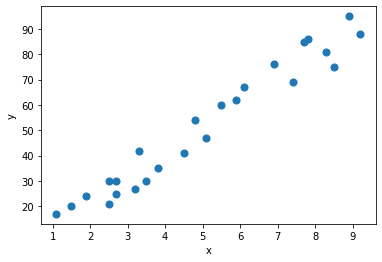

In [4]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y,s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split



X = studentscores.iloc[:, :-1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)

Iteration: 0	 Weight: [5.60425]	 Bias: [29.89]	 Cost: 85.25419450308596
Iteration: 1	 Weight: [5.40657641]	 Bias: [29.65690325]	 Cost: 83.85617776747277
Iteration: 2	 Weight: [5.52801941]	 Bias: [29.4748395]	 Cost: 82.81047489447569
Iteration: 3	 Weight: [5.52204137]	 Bias: [29.27443382]	 Cost: 81.83253145375248
Iteration: 4	 Weight: [5.56651224]	 Bias: [29.08330574]	 Cost: 80.87702820676357
Iteration: 5	 Weight: [5.59058394]	 Bias: [28.89043943]	 Cost: 79.93660635935778
Iteration: 6	 Weight: [5.62247932]	 Bias: [28.70020864]	 Cost: 79.00993249148051
Iteration: 7	 Weight: [5.65095866]	 Bias: [28.51085716]	 Cost: 78.09663157974154
Iteration: 8	 Weight: [5.6805012]	 Bias: [28.32307059]	 Cost: 77.19648301668538
Iteration: 9	 Weight: [5.70932489]	 Bias: [28.13656202]	 Cost: 76.30929301420794
Weight: [5.70932489] Bias: [28.13656202]


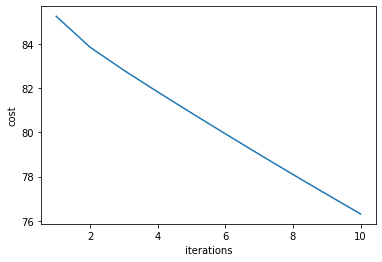

In [84]:
iterations=[1,2,3,4,5,6,7,8,9,10]
cost =[ 85.25419450308596,83.85617776747277,82.81047489447569,81.83253145375248,80.87702820676357,79.93660635935778,79.00993249148051,78.09663157974154,77.19648301668538,76.30929301420794]
plt.plot(iterations,cost)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()